In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sqlalchemy import create_engine
from sklearn import linear_model

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('select * from houseprices', con= engine)
engine.dispose()

house_prices_df = data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [0]:
#separate into strings and numbers
non_numeric = data.select_dtypes(['object']).columns
numeric = data.select_dtypes(['int64', 'float64']).columns

In [0]:
#see which columns are missing data
for col in data:
  null_count = data[col].isnull().sum()
  total_count = data[col].count()
  percent = null_count/total_count
  print(null_count, total_count, percent)



0 1460 0.0
0 1460 0.0
0 1460 0.0
259 1201 0.21565362198168192
0 1460 0.0
0 1460 0.0
1369 91 15.043956043956044
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
8 1452 0.005509641873278237
8 1452 0.005509641873278237
0 1460 0.0
0 1460 0.0
0 1460 0.0
37 1423 0.02600140548137737
37 1423 0.02600140548137737
38 1422 0.026722925457102673
37 1423 0.02600140548137737
0 1460 0.0
38 1422 0.026722925457102673
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
1 1459 0.0006854009595613434
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
0 1460 0.0
690 770 0.8961038961038961
81 1379 0.05873821609862219
81 1379 0.05873821609862219
81 1379 0.05873821609862219
0 1460 0.0
0 1460 0.0
81 1379 0.05873821609862219
81 1379 0.05873821609862219
0 1460 0.0


In [0]:
data[numeric].corr().loc['saleprice'].sort_values(ascending = False)

# overall quality has the strongest correlation

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
threessnporch    0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
id              -0.021917
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
mssubclass      -0.084284
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: salepr

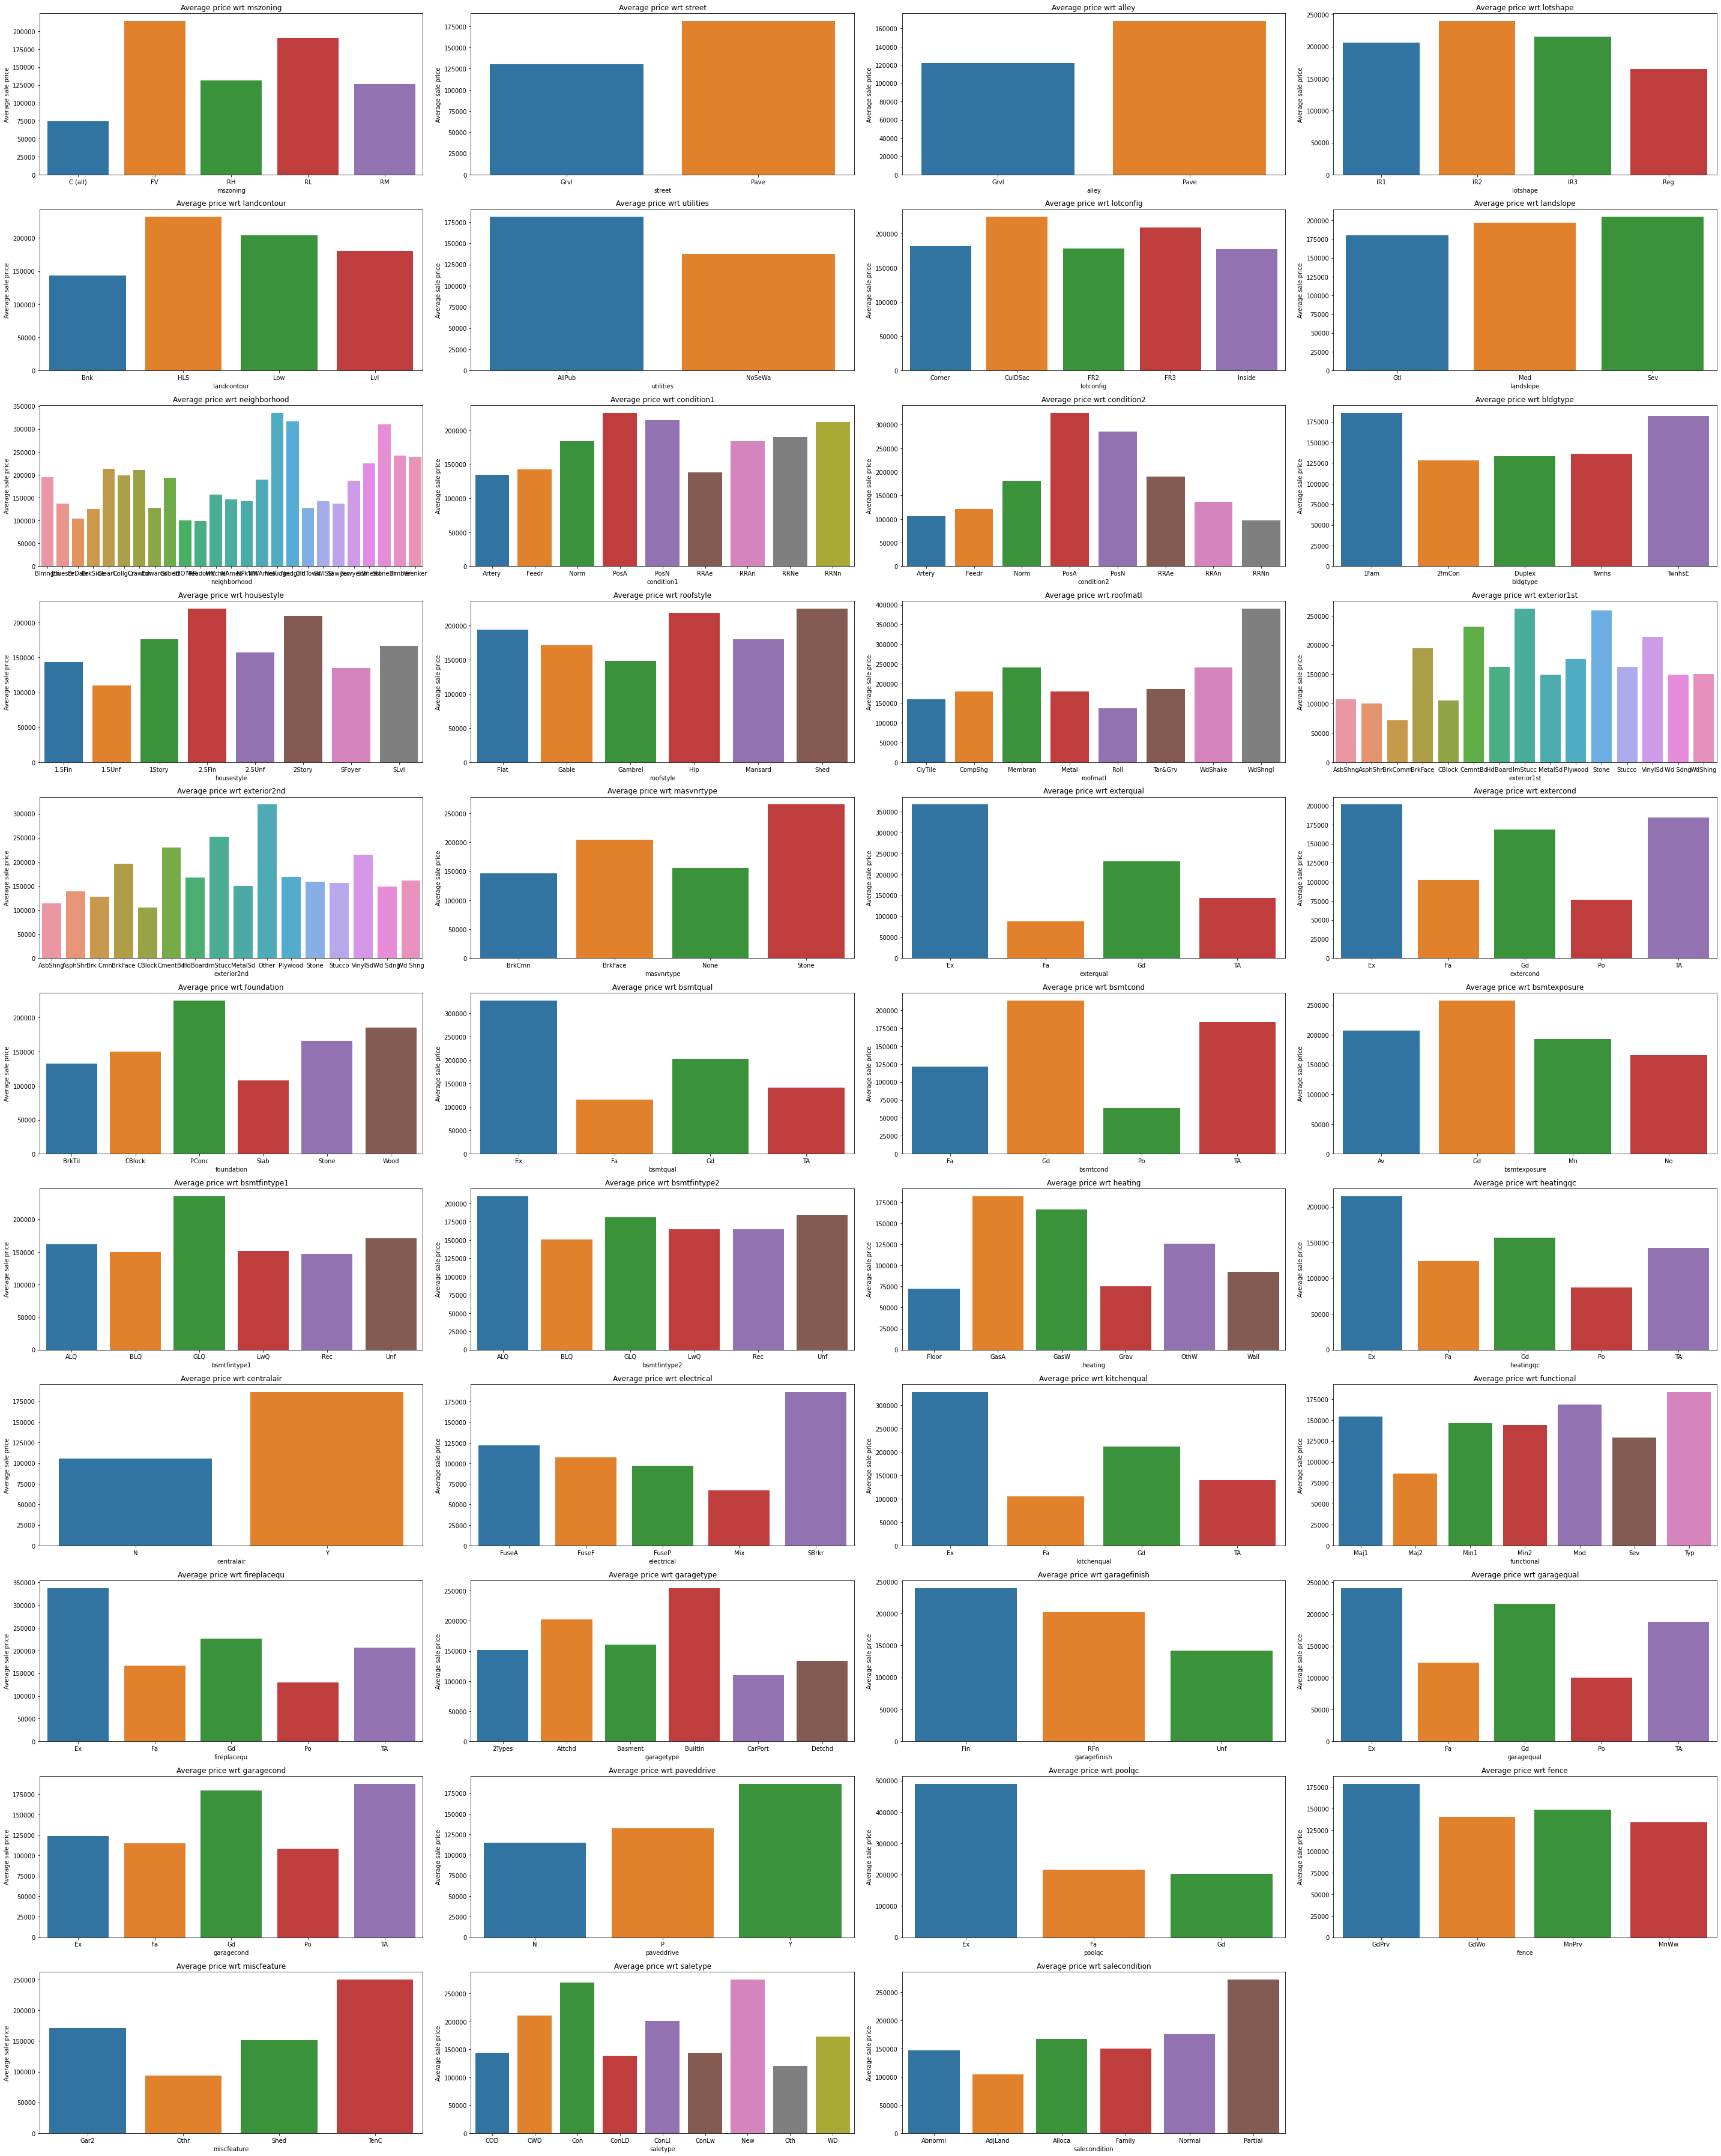

In [0]:
plt.figure(figsize=(40,50))
for index, col in enumerate(non_numeric):
  plt.subplot(11,4,index + 1)
  sns.barplot(data.groupby(col)['saleprice'].mean().index, data.groupby(col)['saleprice'].mean())
  plt.title('Average price wrt {}'.format(col))
  plt.xlabel(col)
  plt.ylabel('Average sale price')

plt.tight_layout()
plt.show()


In [0]:
ms_zoning_dummies = pd.get_dummies(data['mszoning'], drop_first=True)
street_dummies = pd.get_dummies(data['street'], drop_first= True)
data = pd.concat([data, ms_zoning_dummies, street_dummies], axis=1)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [0]:
X = data[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'FV', 'RH','RL', 'RM', 'Pave' ]]
Y = data.saleprice
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

print(lrm.coef_)
print(lrm.intercept_)
import statsmodels.api as sm
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

[2.33265353e+04 4.56343565e+01 1.34501364e+04 1.64082048e+01
 2.83816393e+01 2.50875137e+04 1.34204564e+04 2.85658560e+04
 9.04778936e+03 1.51037622e+02]
-117337.72871399377


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:08:31   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
FV           2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
RH           1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
RL           2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
RM           9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
Pave          151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""